In [3]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import plotly.express as px

from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [4]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [5]:
df_train.shape

(712, 8)

In [6]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [7]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [8]:
features

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [9]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

original_X = pd.DataFrame(original_X, columns=features)
train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

## Simple Logistic Regression

In [10]:
subset_features = ['fare']
original_X_subset = np.reshape(original_X[subset_features].values, (-1,len(subset_features)))
train_X_subset = np.reshape(train_X[subset_features].values, (-1,len(subset_features)))
test_X_subset = np.reshape(test_X[subset_features].values, (-1,len(subset_features)))

In [11]:
model = LogisticRegression(penalty='none')

In [12]:
# stratified (balanced), 5-fold
cross_val_score(model, original_X_subset, original_y).mean()

0.6645031699202812

In [13]:
model = model.fit(train_X_subset, train_y)

In [14]:
model_performance(model, train_X_subset, train_y, test_X_subset, test_y)

Train score
0.6530898876404494
Test score
0.7039106145251397


In [15]:
confusion_matrix(model.predict(train_X_subset), train_y, model.predict(test_X_subset), test_y)

Train
TN: 409, TP: 56, FN: 217, FP: 30
Test
TN: 104, TP: 22, FN: 47, FP: 6


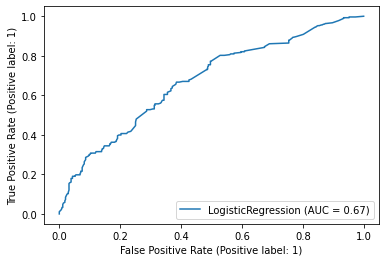

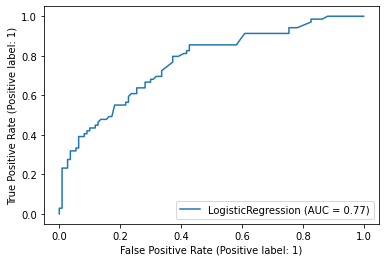

In [16]:
plot_roc_curve(model, train_X_subset, train_y)
plot_roc_curve(model, test_X_subset, test_y)

In [17]:
from scipy.special import expit

df = pd.DataFrame(original_X_subset.ravel(), columns=['fare'])
df['probability of death'] = original_y
fig = px.scatter(df, x='fare', y='probability of death')

X_test = np.linspace(-5, 20, 100)
loss = expit(X_test * model.coef_ + model.intercept_).ravel()
fig.add_trace(px.line(pd.DataFrame(zip(X_test, loss), columns=['x','y']), x='x', y='y').data[0])
fig.update_traces(line_color='red')

## Multiple Logistic Regression

In [18]:
model = LogisticRegression(penalty='none')

In [19]:
# stratified (balanced), 5-fold
cross_val_score(model, original_X, original_y).mean()

0.78788525516289

In [20]:
model = model.fit(train_X, train_y)

In [21]:
pd.DataFrame(zip(model.coef_[0], features), columns=['coef', 'features'])

,coef,features
0,-0.900413,pclass
1,-0.613328,age
2,-0.507807,sibsp
3,-0.073207,parch
4,0.098127,fare
5,0.651877,sex_female
6,-0.651877,sex_male
7,0.086032,embarked_C
8,0.011647,embarked_Q
9,-0.082323,embarked_S


In [22]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.800561797752809
Test score
0.8156424581005587


In [23]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 375, TP: 195, FN: 78, FP: 64
Test
TN: 95, TP: 51, FN: 18, FP: 15


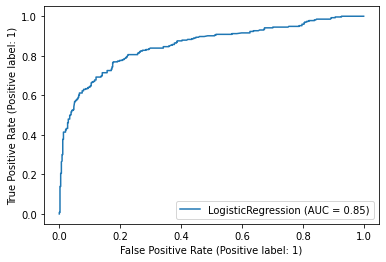

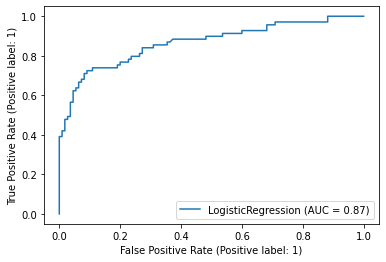

In [24]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)